Name: Nishit Shaileshbhai Rathod           
Student No: N01586439

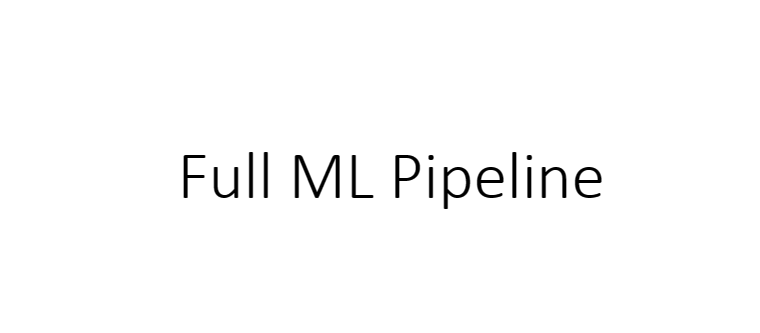

# About The Dataset

## Description

The data set ifood_df.csv consists of 2206 customers of XYZ company with data on:

- Customer profiles
- Product preferences
- Campaign successes/failures
- Channel performance

# Attribute Information


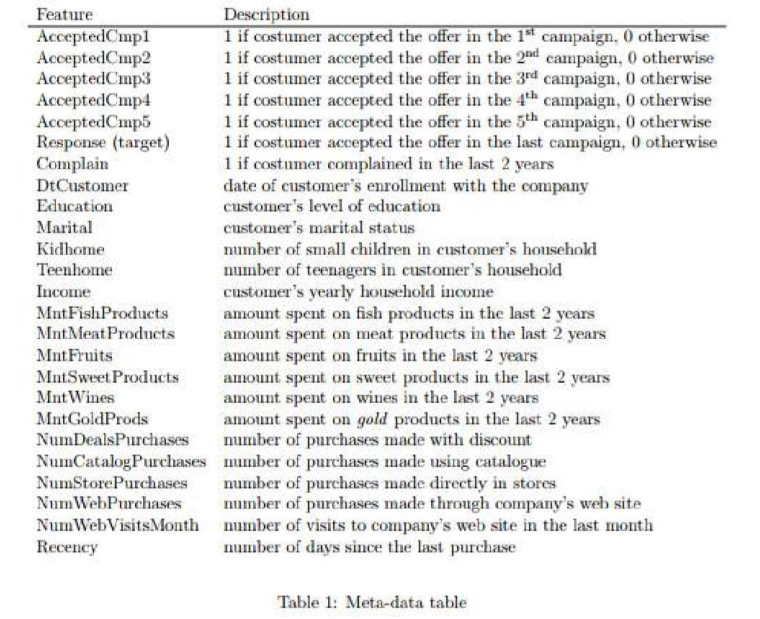

# Importing Python Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import io
import time
import json
import sagemaker.amazon.common as smac
import boto3
import sagemaker


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.sklearn.estimator import SKLearn
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner
from sagemaker.session import Session
from sagemaker.image_uris import retrieve 

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Loading Data from S3 Bucket

In [2]:
# Load data from S3 bucket
s3 = boto3.resource('s3')
bucket_name = 'nr-final-project'
file_name = 'ifood_df.csv'
s3.Bucket(bucket_name).download_file(file_name, file_name)

# Reading the Data

In [3]:
# Load the data into a Pandas dataframe
data = pd.read_csv('ifood_df.csv')

In [4]:
data.head()

,MntTotal,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall
0,1529,58138,0,0,58,635,88,546,172,88,...,1,0,0,0,0,1,0,0,1441,0
1,21,46344,1,1,38,11,1,6,2,1,...,1,0,0,0,0,1,0,0,15,0
2,734,71613,0,0,26,426,49,127,111,21,...,0,1,0,0,0,1,0,0,692,0
3,48,26646,1,0,26,11,4,20,10,3,...,0,1,0,0,0,1,0,0,43,0
4,407,58293,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,1,392,0


# Data Exploration

In [5]:
data.shape

(2205, 37)

In [6]:
data.columns

Index(['MntTotal', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

In [7]:
data.dtypes

MntTotal                int64
Income                  int64
Kidhome                 int64
Teenhome                int64
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Response                int64
Age                     int64
Customer_Days           int64
marital_Divorced        int64
marital_Married         int64
marital_Single          int64
marital_Together        int64
marital_Widow           int64
education_2n Cycle      int64
education_Basic         int64
education_Graduation    int64
education_

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   MntTotal              2205 non-null   int64
 1   Income                2205 non-null   int64
 2   Kidhome               2205 non-null   int64
 3   Teenhome              2205 non-null   int64
 4   Recency               2205 non-null   int64
 5   MntWines              2205 non-null   int64
 6   MntFruits             2205 non-null   int64
 7   MntMeatProducts       2205 non-null   int64
 8   MntFishProducts       2205 non-null   int64
 9   MntSweetProducts      2205 non-null   int64
 10  MntGoldProds          2205 non-null   int64
 11  NumDealsPurchases     2205 non-null   int64
 12  NumWebPurchases       2205 non-null   int64
 13  NumCatalogPurchases   2205 non-null   int64
 14  NumStorePurchases     2205 non-null   int64
 15  NumWebVisitsMonth     2205 non-null   int64
 16  Accept

In [9]:
data.isnull().sum()

MntTotal                0
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntRegularProds         0
AcceptedCmpOverall      0
dtype: int64

In [10]:
data.describe()

,MntTotal,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,562.764626,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,518.707483,0.29932
std,575.936911,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,553.847248,0.68044
min,4.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-283.000000,0.00000
25%,56.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.00000
50%,343.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,288.000000,0.00000
75%,964.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,884.000000,0.00000
max,2491.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2458.000000,4.00000


In [11]:
data.corr()

,MntTotal,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall
MntTotal,1.000000,0.823066,-0.551152,-0.142995,0.021132,0.902310,0.606658,0.861392,0.635038,0.604514,...,0.005940,0.001622,0.035878,-0.060272,-0.138631,0.014332,0.006362,0.070804,0.996569,0.461279
Income,0.823066,1.000000,-0.531699,0.042483,0.006716,0.730495,0.537920,0.702500,0.551758,0.555601,...,-0.015539,-0.001960,0.044336,-0.060621,-0.239604,0.017644,0.021633,0.091176,0.816879,0.388247
Kidhome,-0.551152,-0.531699,1.000000,-0.040207,0.011829,-0.499288,-0.374388,-0.445665,-0.389895,-0.379101,...,0.014525,0.007422,-0.072244,0.019050,0.055308,-0.001930,0.011482,-0.042031,-0.539828,-0.212080
Teenhome,-0.142995,0.042483,-0.040207,1.000000,0.013881,0.002783,-0.176925,-0.267177,-0.206371,-0.164246,...,-0.100454,0.027181,0.047962,-0.056259,-0.120519,-0.024698,0.023806,0.092901,-0.146866,-0.130255
Recency,0.021132,0.006716,0.011829,0.013881,1.000000,0.016470,-0.004909,0.026138,0.001177,0.025535,...,-0.000926,0.023908,-0.001348,-0.006789,-0.003093,0.031419,-0.025563,-0.009234,0.020241,-0.013344
MntWines,0.902310,0.730495,-0.499288,0.002783,0.016470,1.000000,0.384947,0.593119,0.395967,0.388613,...,-0.022598,0.005915,0.034139,-0.096259,-0.140369,-0.060920,0.036403,0.160804,0.901848,0.509913
MntFruits,0.606658,0.537920,-0.374388,-0.176925,-0.004909,0.384947,1.000000,0.568100,0.592556,0.570986,...,0.011982,-0.014210,0.025961,0.025452,-0.060915,0.114919,-0.055581,-0.084301,0.594180,0.155133
MntMeatProducts,0.861392,0.702500,-0.445665,-0.267177,0.026138,0.593119,0.568100,1.000000,0.595673,0.556511,...,0.045575,-0.004064,0.017370,-0.041738,-0.111968,0.064917,-0.004020,-0.004194,0.860663,0.319553
MntFishProducts,0.635038,0.551758,-0.389895,-0.206371,0.001177,0.395967,0.592556,0.595673,1.000000,0.582974,...,0.013809,0.015502,0.041886,0.061304,-0.059840,0.106227,-0.050153,-0.103952,0.620626,0.174675
MntSweetProducts,0.604514,0.555601,-0.379101,-0.164246,0.025535,0.388613,0.570986,0.556511,0.582974,1.000000,...,-0.002711,-0.011220,0.049347,0.060550,-0.057863,0.104075,-0.067723,-0.085702,0.595394,0.200174


# Exploratory Data Analysis

The above code generates a heatmap to visualize the correlation between the columns in the "data" dataframe using the Seaborn library. Here is a brief summary of what the code does:

1. The code imports the seaborn (as sns) and matplotlib.pyplot (as plt) libraries for data visualization.

1. The heatmap() function of seaborn is used to generate a heatmap of the correlation matrix of the columns in the "data" dataframe. The correlation matrix is computed using the corr() function of pandas. The heatmap() function takes several arguments:

- annot=True adds the correlation values to each cell in the heatmap
- cmap='mako' sets the color map for the heatmap
- linewidths=0.2 sets the width of the lines that separate the cells in the heatmap

1. The size of the figure is adjusted using set_size_inches() function of the figure object returned by the gcf() function of matplotlib.pyplot.

1. The show() function of matplotlib.pyplot displays the heatmap.

In summary, this code generates a heatmap to visualize the correlation between the columns in the "data" dataframe, which is useful for identifying potential relationships between variables in the data.

<function matplotlib.pyplot.show(close=None, block=None)>

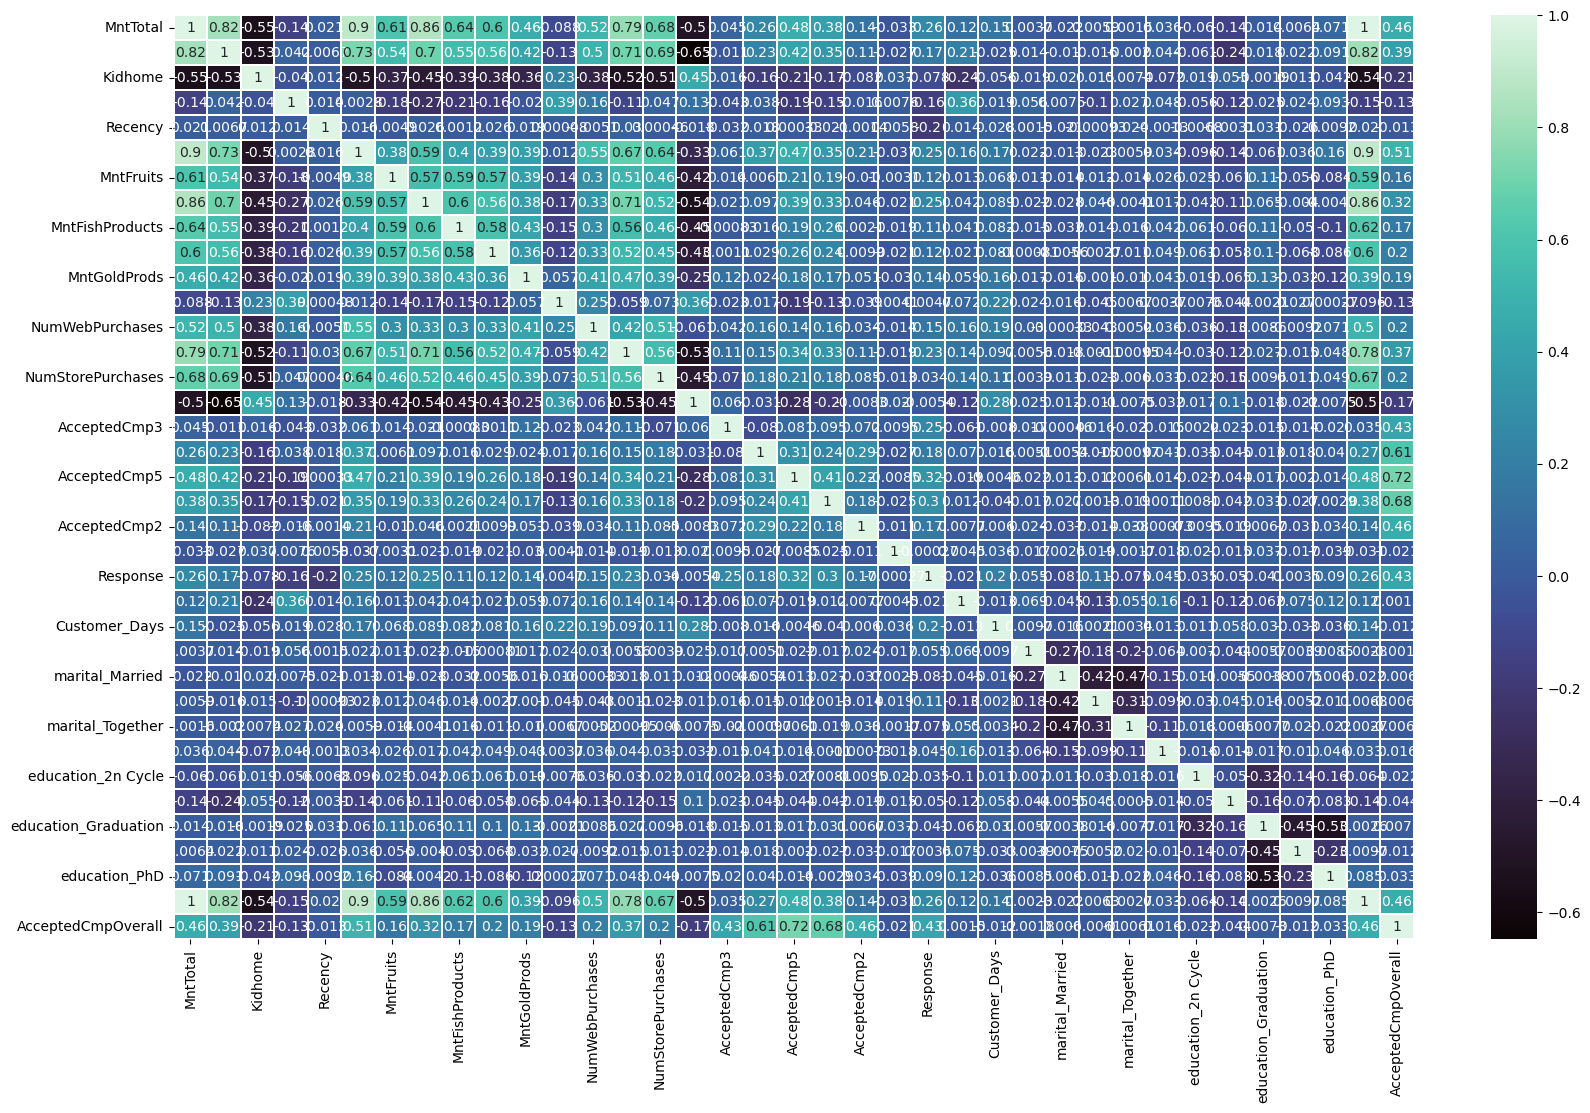

In [12]:
sns.heatmap(data.corr(), annot = True, cmap = 'mako', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.show

# Training Testing And Implementing Linear Learner Algorithm 

# Preparing Data for performing Training, Hyper parameter tuning, Creating Endpoint and establishing Serverless Inferencing.

Amazon SageMaker is a fully-managed service that provides developers and data scientists with the ability to build, train, and deploy machine learning models quickly and easily. It offers a range of features and tools that allow users to streamline the machine learning development process, from data labeling and preprocessing to model training and deployment. In this context, let's discuss the following terms with respect to AWS SageMaker:

1. Training job: A training job is the process of running a machine learning algorithm on a dataset to create a trained model. In AWS SageMaker, you can create a training job by providing your data and code to the platform, which then spins up a cluster of machines to run the job. During the training process, SageMaker automatically manages the hardware resources and optimizes the training process to achieve the best possible performance.


1. Hyperparameter tuning: Hyperparameters are parameters that control the behavior of the machine learning algorithm, such as the learning rate, batch size, and number of hidden layers. Hyperparameter tuning is the process of finding the best set of hyperparameters for a given machine learning problem. In AWS SageMaker, you can use the built-in hyperparameter tuning feature to automatically search for the best set of hyperparameters for your model. SageMaker performs the tuning process by running multiple training jobs with different hyperparameter values and selecting the best one based on a defined metric, such as accuracy or F1 score.


1. Inferencing: Inferencing is the process of using a trained machine learning model to make predictions on new data. In AWS SageMaker, you can use the trained model to perform inferencing on new data by deploying the model to an endpoint. The endpoint provides a web service interface that allows you to send requests to the model and receive predictions in real-time.


1. Endpoint: An endpoint is a web service interface that allows you to deploy a trained machine learning model to the cloud and make predictions on new data. In AWS SageMaker, you can create an endpoint by deploying your trained model to a SageMaker-managed infrastructure. Once the endpoint is created, you can use it to perform real-time inferencing on new data.


1. Serverless Inference: Serverless inference is a deployment option for machine learning models that allows you to perform inferencing without having to manage servers or infrastructure. In AWS SageMaker, you can use the serverless inference feature to deploy your trained model to an AWS Lambda function, which can then be invoked via an API Gateway endpoint. This approach allows you to scale your inferencing workload dynamically based on demand and eliminates the need for managing servers or infrastructure.


In summary, AWS SageMaker provides a range of features and tools that allow you to streamline the machine learning development process, from training and hyperparameter tuning to inferencing and deployment. The platform automates many of the tedious and time-consuming tasks associated with machine learning development, allowing you to focus on building and improving your models. With its built-in integration with other AWS services and support for popular machine learning frameworks, AWS SageMaker is a powerful tool for data scientists and developers looking to build and deploy machine learning models at scale.

In [13]:
data.head()

,MntTotal,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall
0,1529,58138,0,0,58,635,88,546,172,88,...,1,0,0,0,0,1,0,0,1441,0
1,21,46344,1,1,38,11,1,6,2,1,...,1,0,0,0,0,1,0,0,15,0
2,734,71613,0,0,26,426,49,127,111,21,...,0,1,0,0,0,1,0,0,692,0
3,48,26646,1,0,26,11,4,20,10,3,...,0,1,0,0,0,1,0,0,43,0
4,407,58293,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,1,392,0


In [14]:
data2 = pd.read_csv('ifood_df.csv', header = None)

In [15]:
# Drop the first row
data2 = data2.drop(data2.index[0])

In [16]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
1,1529,58138,0,0,58,635,88,546,172,88,...,1,0,0,0,0,1,0,0,1441,0
2,21,46344,1,1,38,11,1,6,2,1,...,1,0,0,0,0,1,0,0,15,0
3,734,71613,0,0,26,426,49,127,111,21,...,0,1,0,0,0,1,0,0,692,0
4,48,26646,1,0,26,11,4,20,10,3,...,0,1,0,0,0,1,0,0,43,0
5,407,58293,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,1,392,0


In [17]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data2, test_size = 0.3, random_state = 42)

In [18]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
585,720,62807,0,1,83,526,28,135,10,21,...,0,1,0,0,0,1,0,0,621,0
1710,1490,70044,0,1,46,1073,0,250,153,14,...,0,0,0,0,0,1,0,0,1476,0
293,92,27038,0,0,64,1,26,25,17,23,...,0,0,1,0,0,1,0,0,77,0
1114,1872,85606,0,1,89,717,42,864,219,30,...,0,1,0,0,0,1,0,0,1788,1
1106,343,39552,1,1,54,165,3,147,4,24,...,0,0,0,0,0,1,0,0,302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,65,33996,0,0,46,40,2,15,8,0,...,1,0,0,0,0,0,0,1,59,0
1096,1406,71819,0,1,70,1224,28,140,0,14,...,0,1,0,0,0,1,0,0,1238,2
1131,1030,57513,0,0,59,735,40,183,52,20,...,0,0,1,0,0,0,0,1,1000,0
1295,54,27238,1,1,39,37,0,17,0,0,...,1,0,0,0,0,0,0,1,51,0


In [19]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
1967,2169,91712,0,0,47,1276,24,746,94,29,...,1,0,0,0,0,0,1,0,2121,1
1092,1059,81698,0,0,1,709,45,115,30,160,...,1,0,0,1,0,0,0,0,1014,1
1469,595,57867,1,0,48,344,35,178,15,23,...,0,1,0,0,0,1,0,0,578,0
439,306,38988,1,2,90,164,24,103,12,3,...,0,0,0,0,0,1,0,0,264,0
1791,721,58582,0,1,15,402,35,106,101,77,...,0,1,0,1,0,0,0,0,679,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,24,30560,1,0,6,9,1,5,4,5,...,0,1,0,0,0,0,1,0,17,0
922,605,56067,0,1,51,517,12,54,16,6,...,0,1,0,0,0,0,0,1,485,0
1190,120,36317,0,1,53,87,3,25,3,2,...,0,1,0,0,0,1,0,0,107,0
344,2092,78618,0,0,87,736,163,818,212,163,...,0,0,0,0,0,1,0,0,2031,1


- Shifting the class in front as that is the pre requirement of XGBOOST ALGORITHM

In [20]:
test_data.to_csv("marketinganalytics_food_finalprojtest.csv", header=False, index = False)

In [21]:
train_data.to_csv("marketinganalytics_food_finalprojtrain.csv", header = False, index = False)

# Training Job

AWS SageMaker is a cloud-based machine learning service provided by Amazon Web Services. It is a fully managed service that provides developers and data scientists with the tools to build, train, and deploy machine learning models at scale. One of the core functionalities of SageMaker is its ability to perform training jobs.

A training job is the process of training a machine learning model on a dataset to generate a trained model that can be used for inference. Training a machine learning model involves two key components: the training data and the machine learning algorithm. The training data is used to teach the model to recognize patterns and make predictions, while the machine learning algorithm is used to optimize the model's performance.

In SageMaker, training jobs can be performed using a variety of built-in algorithms or custom algorithms. These algorithms include linear regression, logistic regression, K-means clustering, and neural networks. Training jobs can also be performed on SageMaker using frameworks such as TensorFlow, PyTorch, and MXNet.

The training process in SageMaker is performed in a number of steps. First, the training data is loaded into Amazon S3, which is a highly scalable object storage service offered by AWS. Next, the training data is preprocessed using a pre-processing script or a built-in SageMaker algorithm. This preprocessing step involves tasks such as data cleaning, feature engineering, and data normalization. The preprocessed data is then split into training and validation sets. The training set is used to train the model, while the validation set is used to measure the model's performance during training.

Once the data has been preprocessed and split, the training job can be initiated. During the training job, the machine learning algorithm uses the training data to optimize the model's parameters. The training job can be configured with a variety of hyperparameters such as learning rate, batch size, and regularization. These hyperparameters can be tuned to optimize the performance of the model.

During the training process, SageMaker provides real-time monitoring of the training job using Amazon CloudWatch. This allows developers to track the progress of the training job and monitor key performance metrics such as accuracy, loss, and learning rate. SageMaker also supports distributed training, which allows the training job to be distributed across multiple instances to speed up the training process.

Once the training job is complete, SageMaker generates a trained model artifact that can be used for inference. This trained model artifact can be stored in Amazon S3 or deployed directly to an endpoint for real-time inference.

Overall, training jobs in SageMaker provide developers and data scientists with a powerful and scalable platform for training machine learning models. The ability to use built-in algorithms, frameworks, and custom algorithms, combined with the ability to configure hyperparameters and monitor the training process in real-time, make SageMaker a versatile and powerful tool for machine learning development.

In [22]:
# Set up the SageMaker session and execution role
role = get_execution_role()
session = sagemaker.Session()
region_name = boto3.Session().region_name

In [23]:
# Set up the SageMaker session and execution role
sagemaker_session = sagemaker.Session()
role = get_execution_role()

# Define the S3 bucket and data prefix
bucket = 'nr-final-project'
data_prefix = 'Linear_Learner_Algorithm_Regression'

# Load data from S3
s3_input_train = sagemaker_session.upload_data(path='marketinganalytics_food_finalprojtrain.csv', bucket=bucket, key_prefix=data_prefix)
s3_input_validation = sagemaker_session.upload_data(path='marketinganalytics_food_finalprojtest.csv', bucket=bucket, key_prefix=data_prefix)

In [24]:
s3_train_data = 's3://nr-final-project/Linear_Learner_Algorithm_Regression/marketinganalytics_food_finalprojtest.csv'
s3_test_data = 's3://nr-final-project/Linear_Learner_Algorithm_Regression/marketinganalytics_food_finalprojtrain.csv'

In [25]:
container = retrieve("linear-learner", region_name, "1")
container

'382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1'

In [26]:
estimator = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m5.xlarge',
    output_path = 's3://nr-final-project/Linear_Learner_Algorithm_Regression/output/',
    sagemaker_session=session)

In [27]:
estimator.set_hyperparameters(feature_dim = 'auto',
                              predictor_type = 'regressor',
                              mini_batch_size = 4,
                              normalize_data = True)

In [28]:
# Set up the input data channels
train_channel = sagemaker.inputs.TrainingInput(
    s3_train_data,
    content_type='text/csv'
)
test_channel = sagemaker.inputs.TrainingInput(
    s3_test_data,
    content_type='text/csv'
)
data_channels = {'train': train_channel, 'test': test_channel}

In [29]:
# Train the model
estimator.fit(inputs=data_channels)

INFO:sagemaker:Creating training-job with name: linear-learner-2023-04-11-17-12-21-129


2023-04-11 17:12:21 Starting - Starting the training job...
2023-04-11 17:12:40 Starting - Preparing the instances for training......
2023-04-11 17:13:52 Downloading - Downloading input data
2023-04-11 17:13:52 Training - Downloading the training image......
2023-04-11 17:14:48 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/11/2023 17:14:58 INFO 140193525667648] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'au

In [30]:
estimator.__dict__

{'image_uri': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1',
 '_hyperparameters': {'feature_dim': 'auto',
  'predictor_type': 'regressor',
  'mini_batch_size': 4,
  'normalize_data': True},
 'role': 'arn:aws:iam::731623272175:role/LabRole',
 'instance_count': 1,
 'instance_type': 'ml.m5.xlarge',
 'keep_alive_period_in_seconds': None,
 'instance_groups': None,
 'volume_size': 30,
 'volume_kms_key': None,
 'max_run': 86400,
 'input_mode': 'File',
 'metric_definitions': None,
 'model_uri': None,
 'model_channel_name': 'model',
 'code_uri': None,
 'code_channel_name': 'code',
 'source_dir': None,
 'git_config': None,
 'container_log_level': 20,
 'code_location': None,
 'entry_point': None,
 'dependencies': [],
 'uploaded_code': None,
 'tags': None,
 'sagemaker_session': <sagemaker.session.Session at 0x7fdd36777070>,
 'base_job_name': 'linear-learner',
 '_current_job_name': 'linear-learner-2023-04-11-17-12-21-129',
 'output_path': 's3://nr-final-project/Linear_Learner_Algo

In [31]:
model_data = estimator.model_data
model_data

's3://nr-final-project/Linear_Learner_Algorithm_Regression/output/linear-learner-2023-04-11-17-12-21-129/output/model.tar.gz'

# Hyper Parameter Tuning

Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to achieve the best possible performance. Hyperparameters are parameters that are set before the training process begins, and they determine the behavior of the machine learning algorithm during training. In AWS SageMaker, hyperparameter tuning is performed using the Automatic Model Tuning feature.

Automatic Model Tuning is a SageMaker feature that automatically searches for the best hyperparameters for a machine learning model. It does this by performing multiple training jobs with different hyperparameter configurations, and then selecting the configuration that produces the best performance. This process is repeated until the best hyperparameters have been identified.

The process of hyperparameter tuning in SageMaker begins by specifying the range of hyperparameters that should be explored during the tuning process. This is done by specifying a hyperparameter tuning job configuration, which includes the range of hyperparameters to explore, the objective metric to optimize, and the search strategy to use.

SageMaker provides a range of search strategies that can be used for hyperparameter tuning, including Bayesian optimization, random search, and grid search. Each search strategy has its own strengths and weaknesses, and the choice of strategy will depend on the specific problem being solved.

Once the hyperparameter tuning job is started, SageMaker automatically creates multiple training jobs with different hyperparameter configurations. Each training job runs on a separate instance, which allows the tuning process to be parallelized and accelerated.

During the tuning process, SageMaker monitors the performance of each training job and records the objective metric, such as accuracy or loss. The objective metric is used to determine which hyperparameter configuration produces the best performance.

Once the tuning process is complete, SageMaker selects the hyperparameter configuration that produced the best performance and generates a trained model artifact. This trained model artifact can be used for inference, and can be deployed to an endpoint for real-time inference.

Hyperparameter tuning in SageMaker provides developers and data scientists with a powerful tool for optimizing the performance of machine learning models. By automating the process of hyperparameter tuning, SageMaker allows developers to focus on other aspects of model development, such as data preprocessing and feature engineering.

Overall, hyperparameter tuning in SageMaker is a powerful feature that enables developers and data scientists to optimize the performance of their machine learning models. By automating the process of hyperparameter tuning, SageMaker simplifies the process of model development and makes it easier to achieve high levels of performance.

In [32]:
region = boto3.Session().region_name
smclient = boto3.Session().client("sagemaker")

role = sagemaker.get_execution_role()

bucket = sagemaker.Session().default_bucket()
prefix = "sagemaker/finalproj-food-linearlearner-nr"

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [33]:
boto3.Session().resource("s3").Bucket(bucket).Object(
    os.path.join(prefix, "train/marketinganalytics_food_finalprojtrain.csv")
).upload_file("marketinganalytics_food_finalprojtrain.csv")
boto3.Session().resource("s3").Bucket(bucket).Object(
    os.path.join(prefix, "validation/marketinganalytics_food_finalprojtest.csv")
).upload_file("marketinganalytics_food_finalprojtrain.csv")

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [34]:
from time import gmtime, strftime, sleep

tuning_job_name = "xgboost-tuningjob-" + strftime("%d-%H-%M-%S", gmtime())

print(tuning_job_name)

tuning_job_config = {
    "ParameterRanges": {
        "CategoricalParameterRanges": [],
        "ContinuousParameterRanges": [
            {
                "MaxValue": "1",
                "MinValue": "0",
                "Name": "eta",
            },
            {
                "MaxValue": "10",
                "MinValue": "1",
                "Name": "min_child_weight",
            },
            {
                "MaxValue": "2",
                "MinValue": "0",
                "Name": "alpha",
            },
        ],
        "IntegerParameterRanges": [
            {
                "MaxValue": "10",
                "MinValue": "1",
                "Name": "max_depth",
            }
        ],
    },
    "ResourceLimits": {"MaxNumberOfTrainingJobs": 20, "MaxParallelTrainingJobs": 3},
    "Strategy": "Bayesian",
    "HyperParameterTuningJobObjective": {"MetricName": "validation:rmse", "Type": "Minimize"},
}


xgboost-tuningjob-11-17-18-41


In [35]:
from sagemaker.image_uris import retrieve

training_image = retrieve(framework="xgboost", region=region, version="1.5-1")

s3_input_train = "s3://{}/{}/train".format(bucket, prefix)
s3_input_validation = "s3://{}/{}/validation/".format(bucket, prefix)

training_job_definition = {
    "AlgorithmSpecification": {"TrainingImage": training_image, "TrainingInputMode": "File"},
    "InputDataConfig": [
        {
            "ChannelName": "train",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_train,
                }
            },
        },
        {
            "ChannelName": "validation",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_validation,
                }
            },
        },
    ],
    "OutputDataConfig": {"S3OutputPath": "s3://{}/{}/output".format(bucket, prefix)},
    "ResourceConfig": {"InstanceCount": 1, "InstanceType": "ml.m4.xlarge", "VolumeSizeInGB": 10},
    "RoleArn": role,
    "StaticHyperParameters": {
        "eval_metric": "rmse",
        "num_round": "100",
        "objective": "reg:squarederror",
        "rate_drop": "0.3",
        "tweedie_variance_power": "1.4",
    },
    "StoppingCondition": {"MaxRuntimeInSeconds": 43200},
}

INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [36]:
smclient.create_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name,
    HyperParameterTuningJobConfig=tuning_job_config,
    TrainingJobDefinition=training_job_definition,
)

{'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:731623272175:hyper-parameter-tuning-job/xgboost-tuningjob-11-17-18-41',
 'ResponseMetadata': {'RequestId': '1d136abb-cac9-4b9f-b8da-23813f1cff3f',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '1d136abb-cac9-4b9f-b8da-23813f1cff3f',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '130',
   'date': 'Tue, 11 Apr 2023 17:18:43 GMT'},
  'RetryAttempts': 0}}

In [38]:
smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)[
    "HyperParameterTuningJobStatus"
]

'Completed'

In [39]:
smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)['HyperParameterTuningJobName']

'xgboost-tuningjob-11-17-18-41'

In [40]:
# run this cell to check current status of hyperparameter tuning job
tuning_job_result = smclient.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name
)

status = tuning_job_result["HyperParameterTuningJobStatus"]
if status != "Completed":
    print("Reminder: the tuning job has not been completed.")

job_count = tuning_job_result["TrainingJobStatusCounters"]["Completed"]
print("%d training jobs have completed" % job_count)

objective = tuning_job_result["HyperParameterTuningJobConfig"]["HyperParameterTuningJobObjective"]
is_minimize = objective["Type"] != "Maximize"
objective_name = objective["MetricName"]

20 training jobs have completed


In [41]:
from pprint import pprint

if tuning_job_result.get("BestTrainingJob", None):
    print("Best model found so far:")
    pprint(tuning_job_result["BestTrainingJob"])
else:
    print("No training jobs have reported results yet.")

Best model found so far:
{'CreationTime': datetime.datetime(2023, 4, 11, 17, 25, 30, tzinfo=tzlocal()),
 'FinalHyperParameterTuningJobObjectiveMetric': {'MetricName': 'validation:rmse',
                                                 'Value': 0.0047599999234080315},
 'ObjectiveStatus': 'Succeeded',
 'TrainingEndTime': datetime.datetime(2023, 4, 11, 17, 26, 10, tzinfo=tzlocal()),
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:731623272175:training-job/xgboost-tuningjob-11-17-18-41-013-3ebd184c',
 'TrainingJobName': 'xgboost-tuningjob-11-17-18-41-013-3ebd184c',
 'TrainingJobStatus': 'Completed',
 'TrainingStartTime': datetime.datetime(2023, 4, 11, 17, 25, 33, tzinfo=tzlocal()),
 'TunedHyperParameters': {'alpha': '0.0',
                          'eta': '0.7585891106371138',
                          'max_depth': '10',
                          'min_child_weight': '5.038034003306704'}}


In [42]:
import pandas as pd

tuner = sagemaker.HyperparameterTuningJobAnalytics(tuning_job_name)

full_df = tuner.dataframe()

if len(full_df) > 0:
    df = full_df[full_df["FinalObjectiveValue"] > -float("inf")]
    if len(df) > 0:
        df = df.sort_values("FinalObjectiveValue", ascending=is_minimize)
        print("Number of training jobs with valid objective: %d" % len(df))
        print({"lowest": min(df["FinalObjectiveValue"]), "highest": max(df["FinalObjectiveValue"])})
        pd.set_option("display.max_colwidth", None)  # Don't truncate TrainingJobName
    else:
        print("No training jobs have reported valid results yet.")

full_df

Number of training jobs with valid objective: 20
{'lowest': 0.0047599999234080315, 'highest': 94.7962875366211}


,alpha,eta,max_depth,min_child_weight,TrainingJobName,TrainingJobStatus,FinalObjectiveValue,TrainingStartTime,TrainingEndTime,TrainingElapsedTimeSeconds
0,1.814634,0.545506,10.0,7.938093,xgboost-tuningjob-11-17-18-41-020-c4be9a2c,Completed,0.272520,2023-04-11 17:28:19+00:00,2023-04-11 17:28:56+00:00,37.0
1,0.000000,1.000000,1.0,8.077582,xgboost-tuningjob-11-17-18-41-019-2fdb2349,Completed,30.193319,2023-04-11 17:28:17+00:00,2023-04-11 17:28:49+00:00,32.0
2,0.925386,0.021866,10.0,1.000000,xgboost-tuningjob-11-17-18-41-018-21778e80,Completed,94.796288,2023-04-11 17:28:08+00:00,2023-04-11 17:28:45+00:00,37.0
3,1.880919,0.443563,5.0,1.000000,xgboost-tuningjob-11-17-18-41-017-28bf0922,Completed,0.972380,2023-04-11 17:27:25+00:00,2023-04-11 17:28:02+00:00,37.0
4,1.543871,0.578216,10.0,1.000000,xgboost-tuningjob-11-17-18-41-016-cce97c40,Completed,0.091780,2023-04-11 17:27:24+00:00,2023-04-11 17:28:01+00:00,37.0
5,0.607848,0.722402,6.0,10.000000,xgboost-tuningjob-11-17-18-41-015-adacaff6,Completed,0.547410,2023-04-11 17:27:14+00:00,2023-04-11 17:27:51+00:00,37.0
6,0.000000,0.592892,5.0,1.000000,xgboost-tuningjob-11-17-18-41-014-c0ab7cc9,Completed,0.605750,2023-04-11 17:25:43+00:00,2023-04-11 17:26:19+00:00,36.0
7,0.000000,0.758589,10.0,5.038034,xgboost-tuningjob-11-17-18-41-013-3ebd184c,Completed,0.004760,2023-04-11 17:25:33+00:00,2023-04-11 17:26:10+00:00,37.0
8,1.649725,0.435051,8.0,4.587320,xgboost-tuningjob-11-17-18-41-012-2f0d92aa,Completed,0.162900,2023-04-11 17:25:24+00:00,2023-04-11 17:26:01+00:00,37.0
9,0.000000,0.387434,9.0,8.272922,xgboost-tuningjob-11-17-18-41-011-1e83dd11,Completed,1.397330,2023-04-11 17:24:41+00:00,2023-04-11 17:25:23+00:00,42.0
